# Table of Contents
 <p><div class="lev1 toc-item"><a data-toc-modified-id="Support-Vector-Machine-1" href="#Support-Vector-Machine"><span class="toc-item-num">1&nbsp;&nbsp;</span>Support Vector Machine</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Линейный-SVM-1.1" href="#Линейный-SVM"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Линейный SVM</a></div><div class="lev3 toc-item"><a data-toc-modified-id="Линейно-разделимый-случай-1.1.1" href="#Линейно-разделимый-случай"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Линейно разделимый случай</a></div><div class="lev3 toc-item"><a data-toc-modified-id="Медленно-убираем-разделимость-1.1.2" href="#Медленно-убираем-разделимость"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Медленно убираем разделимость</a></div><div class="lev1 toc-item"><a data-toc-modified-id="Kernel-trick-2" href="#Kernel-trick"><span class="toc-item-num">2&nbsp;&nbsp;</span>Kernel trick</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Примеры-2.1" href="#Примеры"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Примеры</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Построение-собственного-ядра-2.2" href="#Построение-собственного-ядра"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Построение собственного ядра</a></div><div class="lev1 toc-item"><a data-toc-modified-id="Outro-3" href="#Outro"><span class="toc-item-num">3&nbsp;&nbsp;</span>Outro</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Достоинства-SVM-3.1" href="#Достоинства-SVM"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Достоинства SVM</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Недостатки-SVM-3.2" href="#Недостатки-SVM"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Недостатки SVM</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Полезные-ссылки-3.3" href="#Полезные-ссылки"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Полезные ссылки</a></div>

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Support Vector Machine

Рассмотрим наглядные примеры применения SVM для решения бинарной задачи классификации на двумерных модельных данных. Для начала рассмотрим случай, когда выборка линейно разделима. Напомним, что линейный алгоритм SVM ищёт разделяющую прямую (в общем случае гиперплоскость), максимизирующую зазор между классами. Проведём три разделяющих прямых, с различной шириной разделяющей полосы.

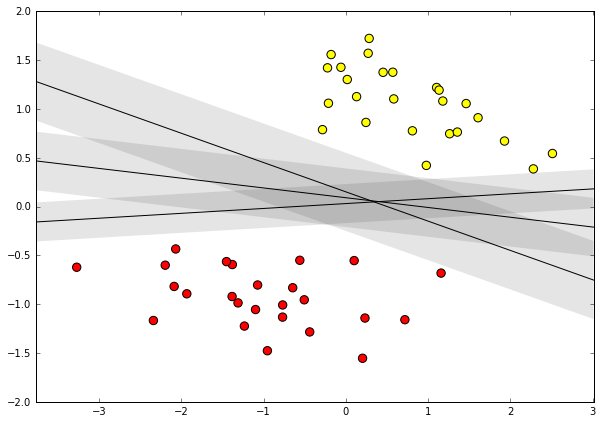

In [2]:
# http://scikit-learn.org/stable/modules/svm.html

from sklearn.datasets.samples_generator import make_classification

X, y = make_classification(n_samples=50, n_features=2, n_informative=2, 
                            n_redundant=0, n_clusters_per_class=1, random_state=0)
x_line = np.linspace(np.min(X) - 0.5, np.max(X) + 0.5)

plt.figure(figsize=(10,7))
plt.scatter(X[:, 0], X[:, 1], c=y, s=70, cmap='autumn')

for a, b, w in [(-0.1, 0.09, 0.3), (0.05, 0.03, 0.2), (-0.3, 0.15, 0.4)]:
    y_line = a * x_line + b
    plt.plot(x_line, y_line, '-k')
    plt.fill_between(x_line, y_line - w, y_line + w, edgecolor='none', color='k', alpha=0.1)
plt.xlim(x_line[0], x_line[-1])
plt.show()

Обучим линейный SVM и отобразим результат на рисунке. Выделенные объекты называются *опорными векторами* - они лежат на границе разделяющей полосы.

## Линейный SVM

In [13]:
from sklearn.svm import SVC

def plot_svc_decision_function(clf, ax=None):
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    XX, YY = np.meshgrid(x, y)
    XY = np.c_[XX.ravel(), YY.ravel()]
    P = clf.decision_function(XY)
    P = P.reshape(XX.shape)
    # plot the margins
    ax.contour(XX, YY, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

### Линейно разделимый случай

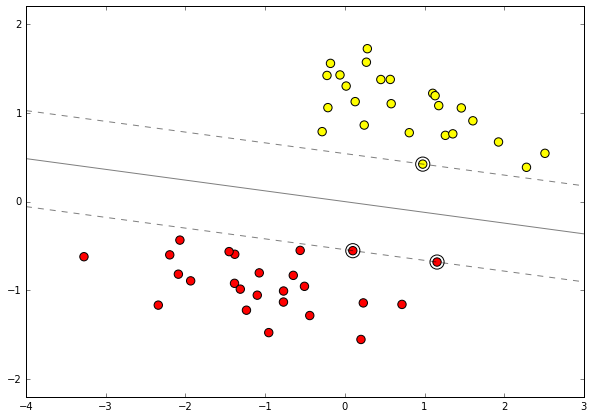

In [18]:
# Fitting linear SVM model
lin_svm = SVC(kernel='linear', C=10).fit(X, y)
# lin_svm = SVC(kernel='poly', C=15).fit(X, y)

# Plotting the splitting hyperplane and support vectors
plt.figure(figsize=(10,7))
plt.scatter(X[:, 0], X[:, 1], c=y, s=70, cmap='autumn')
plot_svc_decision_function(lin_svm)
plt.scatter(lin_svm.support_vectors_[:, 0], lin_svm.support_vectors_[:, 1],
            s=200, facecolors='none')
plt.xlim(-4, 3)
plt.show()

### Медленно убираем разделимость

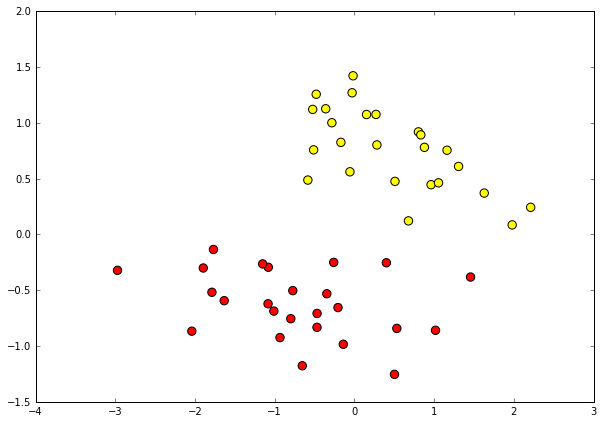

In [23]:
X, y = make_classification(n_samples=50, n_features=2, n_informative=2, class_sep=0.8,
                            n_redundant=0, n_clusters_per_class=1, random_state=0)

plt.figure(figsize=(10,7))
plt.scatter(X[:, 0], X[:, 1], c=y, s=70, cmap='autumn')


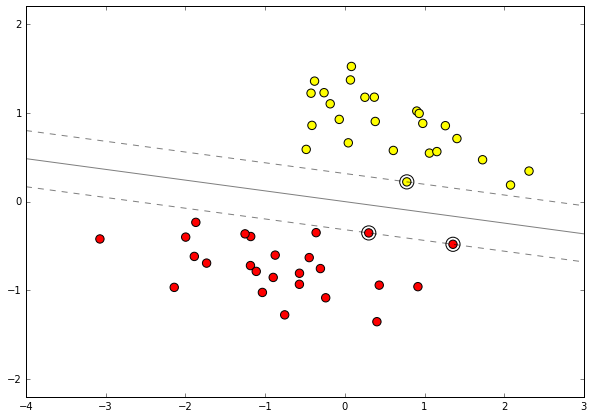

In [43]:
X, y = make_classification(n_samples=50, n_features=2, n_informative=2, class_sep=0.8,
                            n_redundant=0, n_clusters_per_class=1, random_state=0)

# Fitting linear SVM model
lin_svm = SVC(kernel='linear', C=10).fit(X, y)
# lin_svm = SVC(kernel='poly', C=15).fit(X, y)

# Plotting the splitting hyperplane and support vectors
plt.figure(figsize=(10,7))
plt.scatter(X[:, 0], X[:, 1], c=y, s=70, cmap='autumn')
plot_svc_decision_function(lin_svm)
plt.scatter(lin_svm.support_vectors_[:, 0], lin_svm.support_vectors_[:, 1],
            s=200, facecolors='none')
plt.xlim(-4, 3)
plt.show()

# Kernel trick

Как видно, линейные разделяющие поверхности никак не могут дать хорошего качества классификации, в случае такой явно выраженной линейной неразделимости. Напомним, что переход к двойственной задаче оптимизации в алгоритме SVM позволил переписать решающую функцию как сумму скалярных произведений объектов с некоторыми коэффициентами. Заменяя эти скалярные произведения $\langle x_i, x_i \rangle$ на ядровую функцию $K(x_i, x_j) = \langle \varphi(x_i), \varphi(x_j) \rangle$, которая представляет собой скалярное произведение образов исходных объектов в некотором пространстве большей размерности, мы получаем возможность строить более сложные разделяющие поверхности в исходном пространстве. 

Стоит отметить, вычисление значений $K(x_i, x_j)$ может быть сильно упрощено и оптимизировано во многих важных частных случаях, и реализация SVM в sklearn использует такие трюки. Например, в случае полиномиального ядра степени 2, для вычисления значения $K(x_i, x_j)$ не нужно сначала вычислять образы $\varphi(x_i), \varphi(x_j)$, используя формулу:

<center>
<img src="https://upload.wikimedia.org/math/1/5/7/157b3f647240fdce86ca1c96c55943f2.png">
</center>

а затем вычислять скалярное произведение этих векторов в новом пространстве большей размерности. Достаточно вычислить значение $K(x_i, x_j) = (\langle x_i, x_j \rangle + c)^2$. Таким образом, для основных ядер вычисление значения $K(x_i, x_j)$ сводится к вычислению скалярных произведений в исходном (маломерном) пространстве, что позволяет избежать вычисления преобразования $\varphi(x)$ и существенно ускоряет работу алгоритма.

Указанная выше выборка может быть линейно разделена в пространстве размерности 3. Переход туда можно осуществить многими способами. Для начала рассмотрим использование полиномиального ядра степени 2. Ниже приведён образ выборки в трёхмерном пространстве. Видно, что в новом пространстве выборка может быть легко разделена с помощью плоскости.

Описание доступных в scikitlearn ядровых функций можно тут [3]. В scikitlearn есть следующие встроенные функции:

1. линейная (linear): $$\langle x, x'\rangle.$$
2. полиномиальная (polynomial): $$(\gamma \langle x, x'\rangle + r)^d$$ d указывается через degree, r через coef0.
3. Radial basis function kernel rbf[4]: $$\exp(-\gamma |x-x'|^2)$$. $$\gamma$$ указывается через gamma> 0.
4. sigmoid: $$(\tanh(\gamma \langle x,x'\rangle + r))$$ r указывается через coef0.

Рассмотрим теперь случай, когда выборка не является линейно разделимой. Типичный примеры - это концентрические окружности. Обучим линейный SVM и посмотрим на результат.

## Примеры

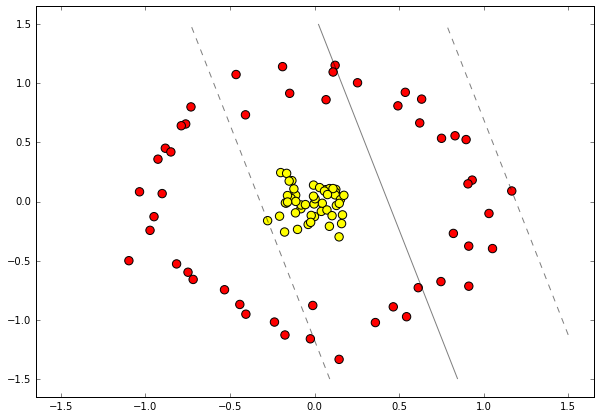

In [48]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(n_samples=100, factor=0.1, 
                    noise=0.1, random_state=0)

lin_svm = SVC(kernel='linear').fit(X, y)

plt.figure(figsize=(10,7))
plt.scatter(X[:, 0], X[:, 1], c=y, s=70, cmap='autumn')
plot_svc_decision_function(lin_svm)
plt.show()

<function __main__.plot_3D>

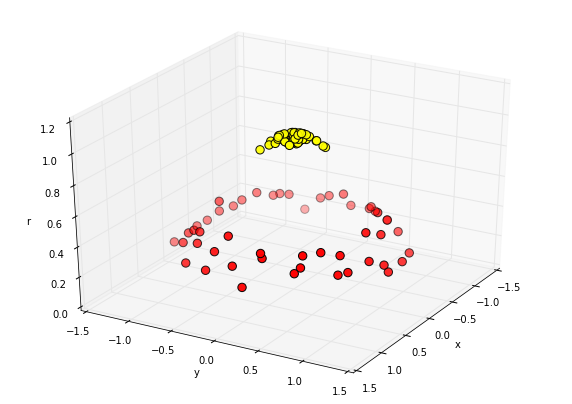

In [51]:
from IPython.html.widgets import interact
from mpl_toolkits import mplot3d

r = X[:, 0] ** 2 + X[:, 1] ** 2

def plot_3D(elev=30, azim=30):
    plt.figure(figsize=(10,7))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], re, c=y, s=70, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 90], azip=(-180, 180))

Обучим SVM с полиномиальным ядром степени 2 и посмотрим на результат его работы в исходном пространстве. Получаем безошибочное разделение выборки на два класса. Заметим, что опорные объекты уже необязательно лежат на границе разделяющей полосы, в отличие от случая линейно разделимой выборки.

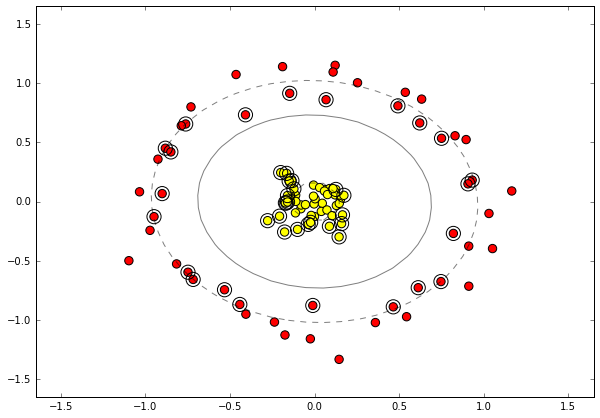

In [52]:
poly_svm = SVC(kernel='poly', degree=2).fit(X, y)

plt.figure(figsize=(10,7))
plt.scatter(X[:, 0], X[:, 1], c=y, s=70, cmap='autumn')
plot_svc_decision_function(poly_svm)
plt.scatter(poly_svm.support_vectors_[:, 0], poly_svm.support_vectors_[:, 1],
            s=200, facecolors='none')
plt.show()

Второй способ вложения исходной выборки в трёхмерное пространство использует так называемое RBF-ядро (от radial basis functions). Посмотрим на результат этого вложения:

<function __main__.plot_3D>

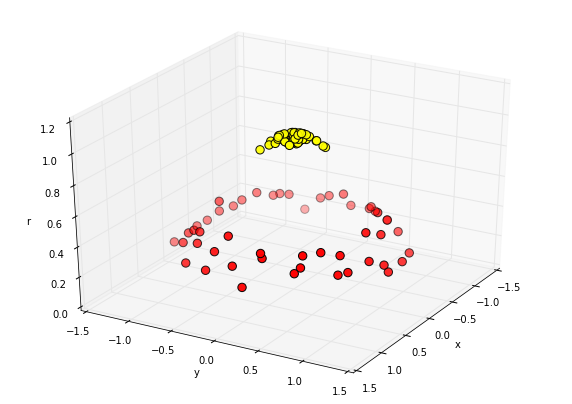

In [53]:
re = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))

interact(plot_3D, elev=[-90, 90], azip=(-180, 180))

Обучим SVM с RBF-ядром и посмотрим на результат его работы в исходном пространстве. Также как и в случае полиномиального ядра получаем безошибочную классификацию.

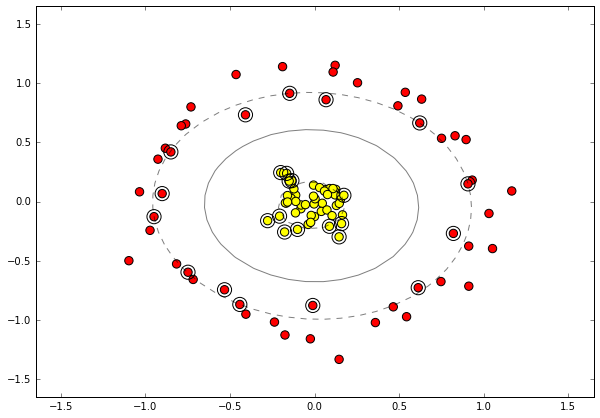

In [26]:
rbf_svm = SVC(kernel='rbf').fit(X, y)

plt.figure(figsize=(10,7))
plt.scatter(X[:, 0], X[:, 1], c=y, s=70, cmap='autumn')
plot_svc_decision_function(rbf_svm)
plt.scatter(rbf_svm.support_vectors_[:, 0], rbf_svm.support_vectors_[:, 1],
            s=200, facecolors='none');
plt.show()

RBF-ядро позволяет строить значительно более сложные поверхности по сравнению с полиномиальным ядром (поскольку формально происходит переход в бесконечномерное пространство), однако это может стать причиной переобучения. Чтобы избежать его, необходимо правильно подбирать параметры ядра. Посмотрим на поведение разделяющей поверхности при изменении объёма выборки, а также при изменении параметра $\gamma$:

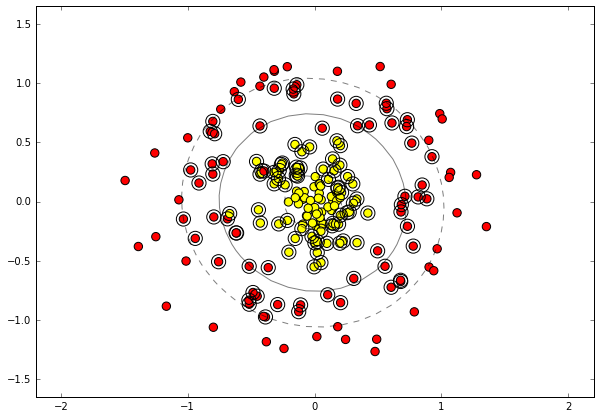

In [56]:
def plot_svm(C=1, gamma=0.10):
    X, y = make_circles(n_samples=200, factor=0.1, 
                        noise=0.2, random_state=0)
    #X, y = X[:N], y[:N]
    rbf = SVC(kernel='rbf', gamma=0.1**gamma, C=C).fit(X, y)
    
    plt.figure(figsize=(10,7))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=70, cmap='autumn')
    plot_svc_decision_function(rbf, plt.gca())
    plt.scatter(rbf.support_vectors_[:, 0], rbf.support_vectors_[:, 1],
                s=200, facecolors='none')
    
interact(plot_svm, C=[0.01, 10, 0.01], gamma=[0.01, 5.0, 0.1])

## Построение собственного ядра

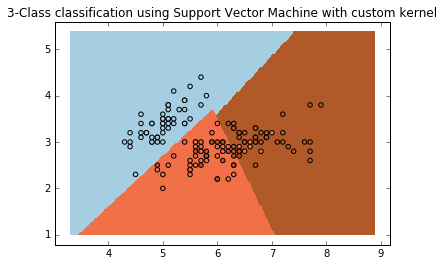

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
Y = iris.target


def my_kernel(X, Y):
    """
    We create a custom kernel:

                 (2  0)
    k(X, Y) = X  (    ) Y.T
                 (0  1)
    """
    M = np.array([[2, 0], [0, 1.0]])
    return ?


h = .02  # step size in the mesh

# we create an instance of SVM and fit out data.
clf = svm.SVC(kernel=my_kernel)
clf.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.title('3-Class classification using Support Vector Machine with custom'
          ' kernel')
plt.axis('tight')
plt.show()

# Outro

## Достоинства SVM

- Эффективная работа в многомерном пространстве.
- Высокая общающая способность. Различные ядровые функции могут использоваться для обучения.


## Недостатки SVM

- Низкая устойчивость к шумовым данным
- Необходимость подбора параметра регуляризации C


## Полезные ссылки
1. SVM: [wiki](https://en.wikipedia.org/wiki/Support_vector_machine) и [machinelearning](http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B0%D1%88%D0%B8%D0%BD%D0%B0_%D0%BE%D0%BF%D0%BE%D1%80%D0%BD%D1%8B%D1%85_%D0%B2%D0%B5%D0%BA%D1%82%D0%BE%D1%80%D0%BE%D0%B2)
2. [Kernel trick](https://en.wikipedia.org/wiki/Kernel_method)
3. http://scikit-learn.org/stable/modules/svm.html#svm-kernels
4. [Kernels Part 1: What is an RBF Kernel? Really?](https://charlesmartin14.wordpress.com/2012/02/06/kernels_part_1/)